In [121]:
# tutorial is based on https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/

import pandas as pd

from sklearn.datasets import load_breast_cancer
heartdiseasedata = pd.read_csv("./heart_cleveland_upload.csv")
heartdiseasedata.rename(columns={'condition': 'class'}, inplace=True)
heartdiseasedata.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [122]:
heartdiseasedata['class'].unique()

array([0, 1])

In [123]:
heartdiseasedata['class'].value_counts()

class
0    160
1    137
Name: count, dtype: int64

In [124]:
heartdiseasedata['class'].value_counts(normalize=True)

class
0    0.538721
1    0.461279
Name: proportion, dtype: float64

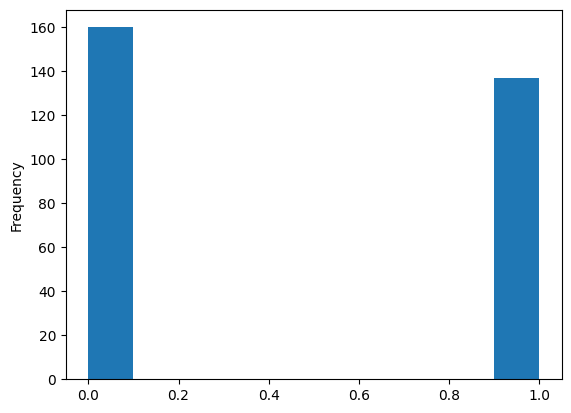

In [125]:
heartdiseasedata['class'].plot.hist();

In [126]:
heartdiseasedata.describe().T

,count,mean,std,min,25%,50%,75%,max
age,297.0,54.542088,9.049736,29.0,48.0,56.0,61.0,77.0
sex,297.0,0.676768,0.468500,0.0,0.0,1.0,1.0,1.0
cp,297.0,2.158249,0.964859,0.0,2.0,2.0,3.0,3.0
trestbps,297.0,131.693603,17.762806,94.0,120.0,130.0,140.0,200.0
chol,297.0,247.350168,51.997583,126.0,211.0,243.0,276.0,564.0
fbs,297.0,0.144781,0.352474,0.0,0.0,0.0,0.0,1.0
restecg,297.0,0.996633,0.994914,0.0,0.0,1.0,2.0,2.0
thalach,297.0,149.599327,22.941562,71.0,133.0,153.0,166.0,202.0
exang,297.0,0.326599,0.469761,0.0,0.0,0.0,1.0,1.0
oldpeak,297.0,1.055556,1.166123,0.0,0.0,0.8,1.6,6.2


In [127]:
# predictors vs class
y = heartdiseasedata['class']
X = heartdiseasedata.drop('class', axis=1) # axis=1 means dropping from the column axis
X_min_max = X.copy()

for col in X_min_max.columns:
    if pd.api.types.is_numeric_dtype(X_min_max[col]):
        X_min_max[col] = (X_min_max[col] - X_min_max[col].min()) / (X_min_max[col].max() - X_min_max[col].min())
X = X_min_max.copy()
X['dummy1'] = 0.0
X['dummy2'] = 0.0
X['dummy3'] = 0.0

In [128]:
from sklearn.model_selection import train_test_split
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = SEED)

In [129]:
xtrain_samples = X_train.shape[0]
xtest_samples = X_test.shape[0]

print(f'There are {xtrain_samples} samples for training and {xtest_samples} samples for testing.')

There are 237 samples for training and 60 samples for testing.


In [130]:
from sklearn.svm import SVC
svc = SVC(kernel='poly',verbose=1,degree=13,gamma=2)

In [131]:
svc.fit(X_train, y_train)

[LibSVM].
*.*
optimization finished, #iter = 609
obj = -0.000000, rho = -1.221902
nSV = 69, nBSV = 0
Total nSV = 69


SVC(degree=13, gamma=2, kernel='poly', verbose=1)

In [132]:
y_pred = svc.predict(X_test)

              precision    recall  f1-score   support

           0       0.72      0.72      0.72        32
           1       0.68      0.68      0.68        28

    accuracy                           0.70        60
   macro avg       0.70      0.70      0.70        60
weighted avg       0.70      0.70      0.70        60



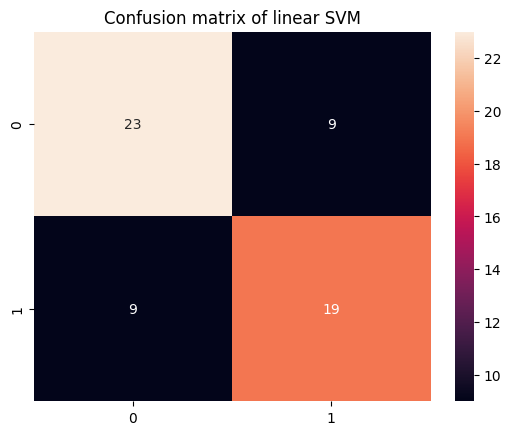

In [133]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix of linear SVM') # fmt='d' formats the numbers as digits, which means integers

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00       109

    accuracy                           1.00       237
   macro avg       1.00      1.00      1.00       237
weighted avg       1.00      1.00      1.00       237



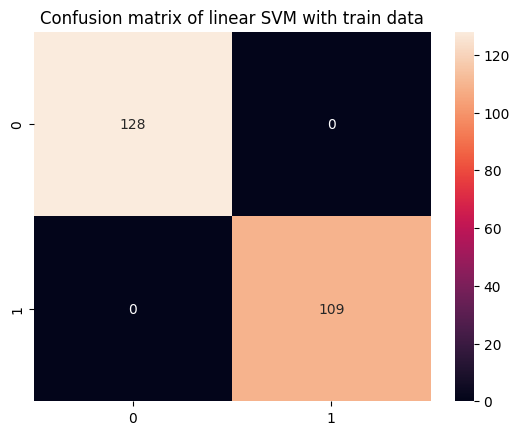

In [134]:
y_pred_train = svc.predict(X_train)

cm_train = confusion_matrix(y_train,y_pred_train)
sns.heatmap(cm_train, annot=True, fmt='d').set_title('Confusion matrix of linear SVM with train data')

print(classification_report(y_train,y_pred_train))

In [135]:
svc.get_params()
print(svc.n_support_)

[39 30]


In [136]:
# get the actual output of SVM
decision_function = svc.decision_function(X_test)

In [137]:
print(decision_function)

[ 3.92200870e+01 -3.86061695e+00 -1.16998992e+00 -1.22465269e+00
  7.71542907e+00 -1.37911190e+00  2.75320202e+01  8.11771435e+00
  3.33027645e+01 -4.50625803e+00 -2.42278301e+01  1.20208110e+01
 -2.69185132e+00 -1.22307733e+00 -1.22311847e+00  1.09379361e+01
  1.26509805e+00 -1.27254976e+00  1.05121445e+01 -4.10556393e-03
  5.15229384e+00  3.62546587e+00 -2.56883822e+00  1.41003538e-02
  1.52253109e+00  1.77365958e+00 -2.81322344e+00  1.35261744e+02
 -7.76333651e-01 -5.16389170e-01  1.40706965e+00  8.65960685e+00
 -1.19119144e+00 -1.28975698e+00  1.50853712e+00  6.02914448e+01
  1.84508209e+00 -1.22624389e+00  3.15594027e+01 -9.38189862e-01
 -1.32689289e+00  5.00194543e+00 -5.04234692e+00 -2.09981338e+00
 -5.77424877e-01  7.66746141e+00 -6.89336488e+00 -2.87576068e+00
 -1.07501389e+00 -1.27502359e+00 -1.86266025e+00  4.51866197e+00
 -4.68680395e-01 -3.53223282e+00  2.49497240e+01 -2.54780453e+01
  2.14741587e+00  1.77811052e+00 -1.69136023e+00  1.30550157e-01]


In [138]:
import numpy as np
print("svc.gamma: ", svc.gamma)
print("svc.degree: ", svc.degree)

sv=open("../data-kernel-model/support_vectors_poly.txt","w")
dual_coeff=open("../data-kernel-model/dual_coeff_poly.txt","w")
intercept=open("../data-kernel-model/intercept_poly.txt","w")
xtestSample="../data-kernel-model/xtest_poly.txt"
ytestSample="../data-kernel-model/ytest_poly.txt"
ytestClassificationScore="../data-kernel-model/yclassificationscore.txt"

np.savetxt(sv,svc.support_vectors_)
    
np.savetxt(dual_coeff,svc.dual_coef_,delimiter=' ')
np.savetxt(intercept,svc.intercept_,delimiter=' ')

with open(xtestSample, "w") as f1:
    for item in X_test.head(1).iloc[0].values:
        f1.write(str(item) + " ")
        
np.savetxt(ytestSample,y_test.head(1), delimiter=' ')
with open(ytestClassificationScore, "w") as f2:
    f2.write(str(decision_function[0]))
    
sv.close()
dual_coeff.close()
intercept.close()
f1.close()
f2.close()

svc.gamma:  2
svc.degree:  13
